# In The Name of GOD

## HW1 - Deep learning

### Ali Khoramfar
### MohammadMahdi Barghi

# Q1

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [3]:
class MccullochPittsNeuron:
    def __init__(self, weights, threshold):
      self.weights = weights
      self.threshold = threshold

    def activate(self, inputs):
      value_checker = 0

      for i in range(len(self.weights)):
        neuron_value = self.weights[i] * inputs[i]
        value_checker += neuron_value

      if value_checker >= self.threshold:
        return 1
      else:
        return 0

In [4]:
def xor(bits):
  n1 = MccullochPittsNeuron([2,-1], 2)
  n2 = MccullochPittsNeuron([-1,2], 2)
  n3 = MccullochPittsNeuron([2,2], 2)

  n1_out = n1.activate([bits[0],bits[1]])
  n2_out = n2.activate([bits[0],bits[1]])
  n3_out = n3.activate([n1_out,n2_out])


  return n3_out

In [5]:
def or_neuron (bits):
  n1 = MccullochPittsNeuron([2,2], 2)
  return n1.activate([bits[0],bits[1]])

In [6]:
print(xor([0,1]))
print(xor([0,0]))
print(xor([1,1]))
print(xor([1,0]))

1
0
0
1


In [7]:
print(or_neuron([1,1]))
print(or_neuron([1,0]))
print(or_neuron([0,1]))
print(or_neuron([0,0]))

1
1
1
0


In [8]:
def twos_complement(input_bit):
  out0 = input_bit[3]
  out1 = xor([input_bit[3],input_bit[2]])
  carry1 = or_neuron([input_bit[3],input_bit[2]])
  out2 = xor([carry1,input_bit[1]])
  carry2 = or_neuron([carry1,input_bit[1]])
  out3 = xor([carry2,input_bit[0]])

  return([out3,out2,out1,out0])

In [10]:
print(f"input: {[0, 0, 0, 0]} --> output: {twos_complement([0, 0, 0, 0])}")
print(f"input: {[0, 1, 0, 0]} --> output: {twos_complement([0, 1, 0, 0])}")
print(f"input: {[0, 0, 1, 0]} --> output: {twos_complement([0, 0, 1, 0])}")
print(f"input: {[0, 1, 1, 0]} --> output: {twos_complement([0, 1, 1, 0])}")
print(f"input: {[0, 0, 0, 1]} --> output: {twos_complement([0, 0, 0, 1])}")
print(f"input: {[0, 1, 0, 1]} --> output: {twos_complement([0, 1, 0, 1])}")
print(f"input: {[0, 0, 1, 1]} --> output: {twos_complement([0, 0, 1, 1])}")
print(f"input: {[0, 1, 1, 1]} --> output: {twos_complement([0, 1, 1, 1])}")
print(f"input: {[1, 0, 0, 0]} --> output: {twos_complement([1, 0, 0, 0])}")
print(f"input: {[1, 1, 0, 0]} --> output: {twos_complement([1, 1, 0, 0])}")
print(f"input: {[1, 0, 1, 0]} --> output: {twos_complement([1, 0, 1, 0])}")
print(f"input: {[1, 1, 1, 0]} --> output: {twos_complement([1, 1, 1, 0])}")
print(f"input: {[1, 0, 0, 1]} --> output: {twos_complement([1, 0, 0, 1])}")
print(f"input: {[1, 1, 0, 1]} --> output: {twos_complement([1, 1, 0, 1])}")
print(f"input: {[1, 0, 1, 1]} --> output: {twos_complement([1, 0, 1, 1])}")
print(f"input: {[1, 1, 1, 1]} --> output: {twos_complement([1, 1, 1, 1])}")

input: [0, 0, 0, 0] --> output: [0, 0, 0, 0]
input: [0, 1, 0, 0] --> output: [1, 1, 0, 0]
input: [0, 0, 1, 0] --> output: [1, 1, 1, 0]
input: [0, 1, 1, 0] --> output: [1, 0, 1, 0]
input: [0, 0, 0, 1] --> output: [1, 1, 1, 1]
input: [0, 1, 0, 1] --> output: [1, 0, 1, 1]
input: [0, 0, 1, 1] --> output: [1, 1, 0, 1]
input: [0, 1, 1, 1] --> output: [1, 0, 0, 1]
input: [1, 0, 0, 0] --> output: [1, 0, 0, 0]
input: [1, 1, 0, 0] --> output: [0, 1, 0, 0]
input: [1, 0, 1, 0] --> output: [0, 1, 1, 0]
input: [1, 1, 1, 0] --> output: [0, 0, 1, 0]
input: [1, 0, 0, 1] --> output: [0, 1, 1, 1]
input: [1, 1, 0, 1] --> output: [0, 0, 1, 1]
input: [1, 0, 1, 1] --> output: [0, 1, 0, 1]
input: [1, 1, 1, 1] --> output: [0, 0, 0, 1]


# Q2

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.utils import to_categorical
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras.backend as K
from keras.losses import categorical_crossentropy

## Q2-1 Load and check dataset


In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(f"number of training samples: {train_images.shape[0]}")
print(f"size of each training image: {train_images.shape[1:]}")
print(f"number of test samples: {test_images.shape[0]}")
print(f"size of each test image: {test_images.shape[1:]}")

number of training samples: 60000
size of each training image: (28, 28)
number of test samples: 10000
size of each test image: (28, 28)


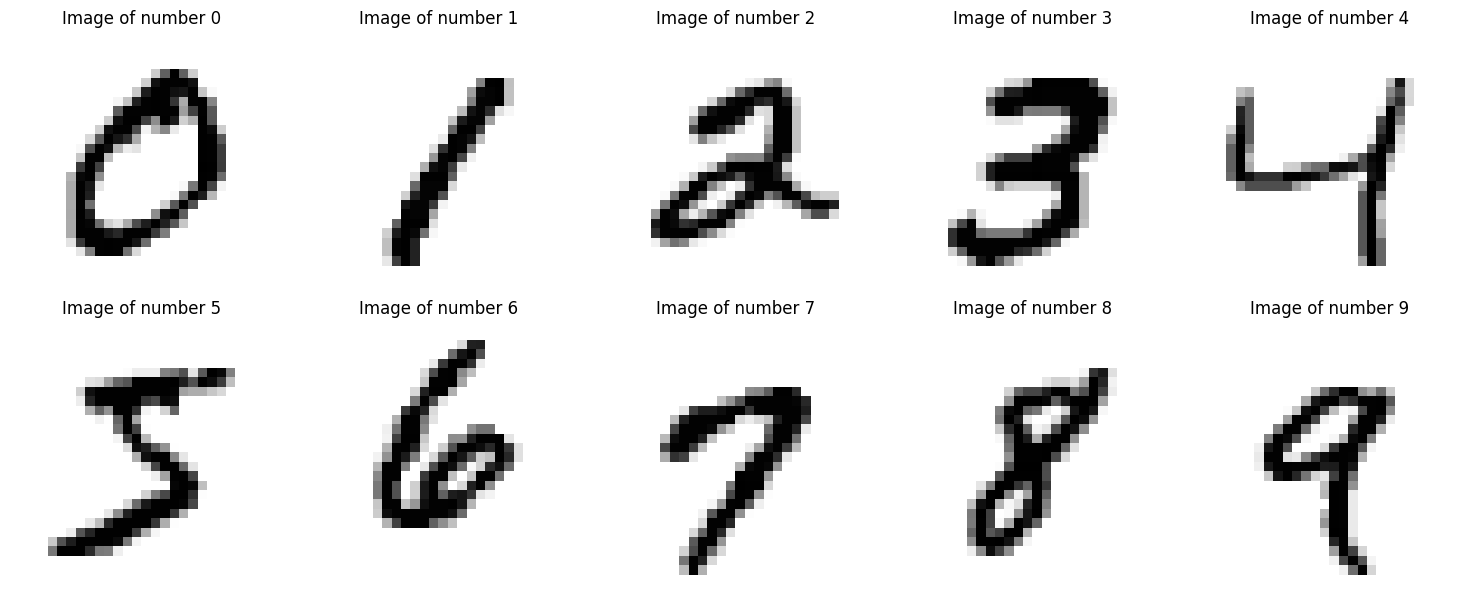

In [6]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    image = train_images[train_labels == i][0]
    axs[i//5, i%5].imshow(image, cmap=plt.cm.binary)
    axs[i//5, i%5].set_title(f"Image of number {i}")
    axs[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()


In [7]:
train_classes, counts = np.unique(train_labels, return_counts=True)
train_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
test_classes, counts = np.unique(test_labels, return_counts=True)
test_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

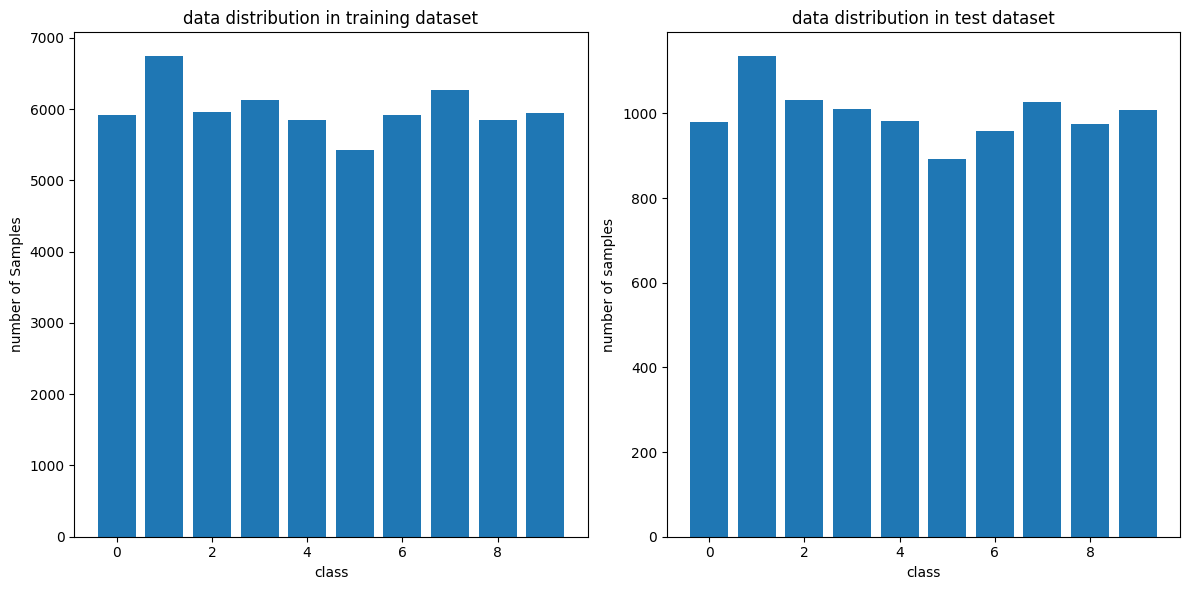

In [9]:
train_class_distribution = np.bincount(train_labels)
test_class_distribution = np.bincount(test_labels)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(10), train_class_distribution)
plt.title('data distribution in training dataset')
plt.xlabel('class')
plt.ylabel('number of Samples')

plt.subplot(1, 2, 2)
plt.bar(range(10), test_class_distribution)
plt.title('data distribution in test dataset')
plt.xlabel('class')
plt.ylabel('number of samples')

plt.tight_layout()
plt.show()


In [10]:
if np.std(train_class_distribution) > 0.1 * np.mean(train_class_distribution) or np.std(test_class_distribution) > 0.1 * np.mean(test_class_distribution):
    print("unbalance")
else:
    print("balance")

balance


## Q2-2

In [11]:
min_pixel_value = np.min(train_images)
max_pixel_value = np.max(train_images)

print('min pixel:', min_pixel_value)
print('max pixel:', max_pixel_value)

min pixel: 0
max pixel: 255


In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Min-max normalization is a technique often used to linearly scale every feature to the range [0,1]. In the context of the MNIST dataset, the pixel values range from 0 to 255. By dividing each pixel value by 255, we scale the data to the range [0,1].

The reason for doing this is that gradient descent converges much faster with smaller values. When features are on similar scales, the level curves of the cost function are more spherical, and gradient descent can take a more direct path to the minimum. If features are on different scales, the level curves of the cost function are elongated, and gradient descent may oscillate back and forth and take a long time to find the minimum.

## Q2-3

In [13]:
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [14]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [16]:
model.compile(optimizer=Adam(learning_rate=6e-5), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 25s 12ms/step - loss: 0.5241 - accuracy: 0.8644
Epoch 2/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2049 - accuracy: 0.9428
Epoch 3/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1540 - accuracy: 0.9559
Epoch 4/25
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1240 - accuracy: 0.9649
Epoch 5/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1030 - accuracy: 0.9710
Epoch 6/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0867 - accuracy: 0.9753
Epoch 7/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0738 - accuracy: 0.9795
Epoch 8/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0634 - accuracy: 0.9819
Epoch 9/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0547 - accuracy: 0.9845
Epoch 10/25
1875/1875 [==============================] - 17s 9ms/step -

In [18]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"loss: {loss}")
print(f"accuracy: {accuracy}")

313/313 [==============================] - 2s 4ms/step - loss: 0.0752 - accuracy: 0.9804
loss: 0.07522798329591751
accuracy: 0.980400025844574


In [19]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


The input size of 784 is chosen because the images in the MNIST dataset are 28x28 pixels. When these images are flattened into a 1D array (which is a common preprocessing step for feeding image data into a fully connected neural network), the resulting array has a length of 28*28 = 784. Therefore, the input layer of the network must have the same number of nodes to match this input size.




The activation function in the last layer of a neural network is often different because it is tailored to the specific type of output that the model is designed to predict1. In the case of your model, the last layer uses the softmax activation function because it’s a multi-class classification problem. The softmax function outputs a vector that represents the probability distributions of a list of potential outcomes. It’s a more generalized logistic activation function that’s used for multi-class classification2.

As for logits, they are the raw, non-normalized output values that a classification model generates, which are then passed to a normalization function like softmax3. If the model is solving a binary classification problem, these logits can be understood as the log-odds, and they can be converted to probabilities using the sigmoid function4. In the context of deep learning, logits have a significant role in improving the numerical stability of the learning process. When combined with softmax, the logit values can be interpreted as unnormalized log probabilities3.

## Q2-4- FGSM

In [20]:
def fgsm(model, x, y, epsilon):
    x_tensor_format = tf.convert_to_tensor(x, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(x_tensor_format)
        predicted_result = model(x_tensor_format)
        loss = tf.keras.losses.categorical_crossentropy(y, predicted_result)

    gradients = tape.gradient(loss, x_tensor_format)
    sing_of_grad = tf.sign(gradients)
    delta = epsilon * sing_of_grad

    return delta

In [37]:
delta = fgsm(model, train_images, train_labels, 0.1)

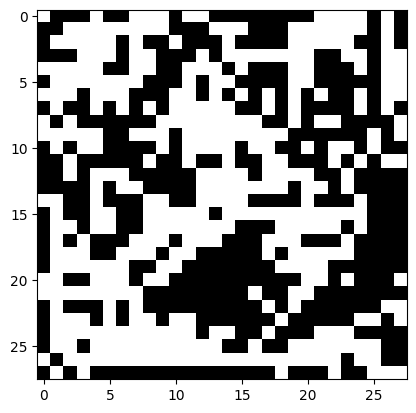

In [22]:
noise = delta[500].numpy()
noise = noise.reshape((28, 28))
plt.imshow(noise, cmap=plt.cm.binary)
plt.show()

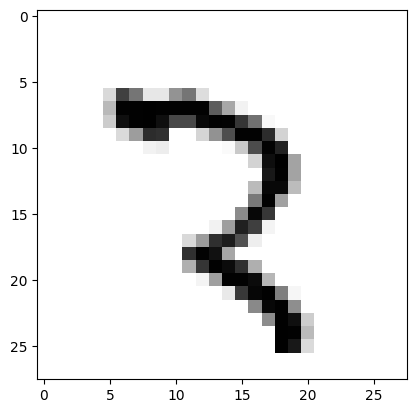

In [23]:
good_sample_img = train_images[500]
good_sample_img = good_sample_img.reshape((28, 28))
plt.imshow(good_sample_img, cmap=plt.cm.binary)
plt.show()

In [38]:
bad_train_images = train_images + delta
predict_attacked_train = model.predict(bad_train_images)

1875/1875 [==============================] - 11s 6ms/step


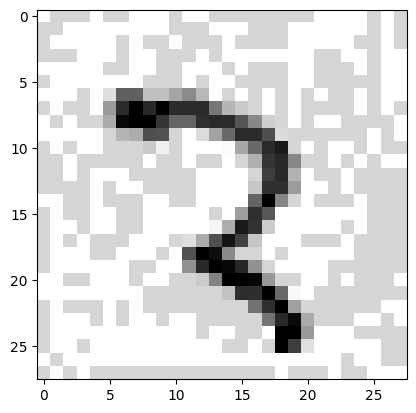

In [25]:
noisy_sample_img = bad_train_images[500].numpy()
noisy_sample_img = noisy_sample_img.reshape((28, 28))
plt.imshow(noisy_sample_img, cmap=plt.cm.binary)
plt.show()

In [26]:
sample_label = np.argmax(train_labels[500])
print(f"label: {sample_label}")
predictions_class = np.argmax(predict_attacked_train[500])
print(f"predict: {predictions_class}")

label: 3
predict: 2


In [27]:
loss, accuracy = model.evaluate(bad_train_images, train_labels)

print('loss:', loss)
print('accuracy:', accuracy)

1875/1875 [==============================] - 6s 3ms/step - loss: 25.8158 - accuracy: 0.0386
loss: 25.815752029418945
accuracy: 0.0385500006377697


In [28]:
test_delta = fgsm(model, test_images, test_labels, 0.1)
test_images_adv = test_images + test_delta
predict_attacked_test = model.predict(test_images_adv)

313/313 [==============================] - 1s 4ms/step


In [29]:
loss, accuracy = model.evaluate(test_images_adv, test_labels)

print('loss:', loss)
print('accuracy:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 26.0809 - accuracy: 0.0388
loss: 26.080890655517578
accuracy: 0.03880000114440918


1/1 [==============================] - 0s 32ms/step


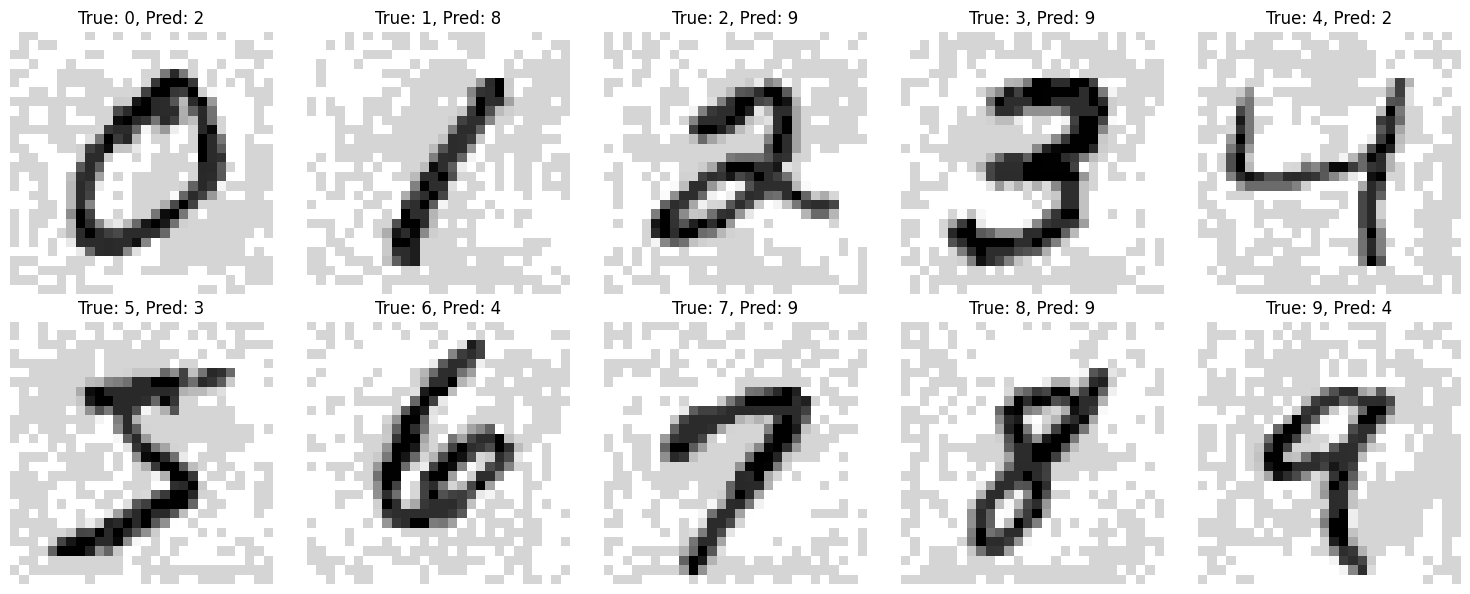

In [39]:
train_label_class = np.argmax(train_labels, axis=1)
classes, counts = np.unique(train_label_class, return_counts=True)

examples = []

for c in classes:
    andis = np.where(train_label_class == c)[0]
    example = bad_train_images[andis[0]]
    examples.append(example)

examples = np.array(examples)
predictions = model.predict(examples)
predictions_class = np.argmax(predictions, axis=1)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(len(examples)):
    axs[i//5, i%5].imshow(examples[i].reshape((28, 28)), cmap=plt.cm.binary)
    axs[i//5, i%5].set_title(f"True: {classes[i]}, Pred: {predictions_class[i]}")
    axs[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()

## Q2-4- PGD

In [40]:
def pdg(model, images, labels, epsilon, alpha, num_iter):
    attack_mask = tf.zeros_like(images)

    for i in range(num_iter):
        with tf.GradientTape() as tape:
            tape.watch(attack_mask)
            bad_sample = images + attack_mask
            predictions = model(bad_sample)
            loss = tf.keras.losses.categorical_crossentropy(labels, predictions)

        gradients = tape.gradient(loss, attack_mask)
        sign_of_gradient = tf.sign(gradients)
        attack_mask += alpha * sign_of_gradient
        attack_mask = tf.clip_by_value(attack_mask, -epsilon, epsilon)

    return attack_mask

In [41]:
delta = pdg(model, train_images, train_labels, epsilon=0.1, alpha=0.01, num_iter=40)
bad_train_images = train_images + delta
predict_attacked_train = model.predict(bad_train_images)

1875/1875 [==============================] - 7s 4ms/step


In [42]:
loss, accuracy = model.evaluate(bad_train_images, train_labels)

print('loss:', loss)
print('accuracy:', accuracy)

1875/1875 [==============================] - 7s 4ms/step - loss: 36.9725 - accuracy: 1.8333e-04
loss: 36.97246170043945
accuracy: 0.000183333337190561


In [43]:
delta = pdg(model, test_images, test_labels, epsilon=0.1, alpha=0.01, num_iter=40)
bad_test_images = test_images + delta
predict_attacked_test = model.predict(bad_test_images)

313/313 [==============================] - 1s 3ms/step


In [44]:
loss, accuracy = model.evaluate(bad_test_images, test_labels)

print('loss:', loss)
print('accuracy:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 37.2519 - accuracy: 1.0000e-04
loss: 37.25192642211914
accuracy: 9.999999747378752e-05


1/1 [==============================] - 0s 22ms/step


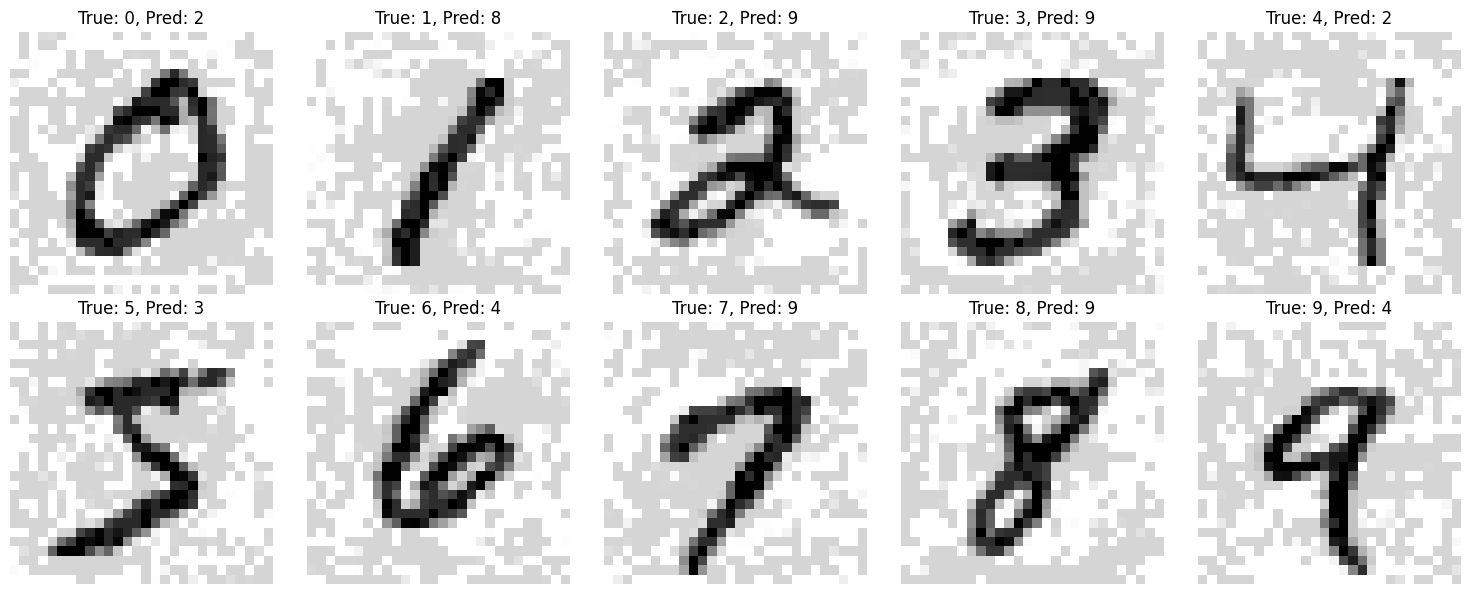

In [45]:
train_label_class = np.argmax(train_labels, axis=1)
classes, counts = np.unique(train_label_class, return_counts=True)

examples = []

for c in classes:
    andis = np.where(train_label_class == c)[0]
    example = bad_train_images[andis[0]]
    examples.append(example)

examples = np.array(examples)
predictions = model.predict(examples)
predictions_class = np.argmax(predictions, axis=1)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(len(examples)):
    axs[i//5, i%5].imshow(examples[i].reshape((28, 28)), cmap=plt.cm.binary)
    axs[i//5, i%5].set_title(f"True: {classes[i]}, Pred: {predictions_class[i]}")
    axs[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()
